# Social Network Analysis @ UNIPI
## Solution of the First Midterm  
### 2/4/2019

*Note:* The total points available for this midterm were 34 (instead of the usual 32) to account for the introduction of a novel exercise (Newman's assortativity) for which no previous solutions were available. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Es 1: Graph Modeling

Given the matrix $\mathcal{G}$

| &nbsp;  | &nbsp;  | &nbsp;  | &nbsp;  | &nbsp;  |
| --- | --- | --- | --- | --- |
| 0 | 2 | 0 | 1 | 0 |
| 0 | 0 | 3 | 0 | 0 |
| 0 | 1 | 0 | 1 | 2 |
| 2 | 0 | 4 | 0 | 0 |
| 1 | 0 | 1 | 1 | 0 |

- Draw $\mathcal{G}$;
- Synthetically characterize the graph $\mathcal{G}$ describes (directedness, number of nodes/edges, density, components, max/min/avg degrees\dots).


**Notes:** 
- In the solution were considered acceptable both the interpretation of the graph as weighted or multigraph.
- Degree and average degree indicators were considered acceptable also their weighted versions (although a minor error were considered if they were not specified as such).
- A severe error were considered whenever in the density computation the multigraph edge cardinality has been used instead to the plain edge cardinality.

In [2]:
g = nx.DiGraph()

In [3]:
g.add_edge(1, 2, weight=2)
g.add_edge(1, 4, weight=1)
g.add_edge(2, 3, weight=3)
g.add_edge(3, 2, weight=1)
g.add_edge(3, 4, weight=1)
g.add_edge(3, 5, weight=2)
g.add_edge(4, 1, weight=2)
g.add_edge(4, 3, weight=4)
g.add_edge(5, 1, weight=1)
g.add_edge(5, 3, weight=1)
g.add_edge(5, 4, weight=1)

#### nx.draw(g, with_labels=True, node_size=1000)
plt.show()

In [4]:
g.is_directed()

True

In [5]:
g.number_of_edges(), g.number_of_nodes()

(11, 5)

In [6]:
nx.density(g) # considering self-loops, 0.4 without considering self-loops

0.55

In [7]:
nx.number_strongly_connected_components(g), nx.number_weakly_connected_components(g)

(1, 1)

In [8]:
degs = dict(g.degree())

In [9]:
max(degs.values()), min(degs.values()), np.mean(list(degs.values()))

(6, 3, 4.4)

In [10]:
in_degs = dict(g.in_degree())

In [11]:
max(in_degs.values()), min(in_degs.values()), np.mean(list(in_degs.values()))

(3, 1, 2.2)

In [12]:
out_degs = dict(g.out_degree())

In [13]:
max(out_degs.values()), min(out_degs.values()), np.mean(list(out_degs.values()))

(3, 1, 2.2)

## Exercise 2: Synthetic graphs

Let $\mathcal{E}$ be an Erdos-Renyi graph having 50124 edges and a connection probability of 0.02:
- How many nodes have $\mathcal{E}$?
- What will be the average degree of $\mathcal{E}$ nodes? and the graph density?
- Describe the regime of $\mathcal{E}$.

In [14]:
e = 50124
p = 0.02

In [15]:
c = 2*e/p

In [16]:
n = 1/2 * (1 + math.sqrt(1 + 4*c))
int(n)

2239

In [17]:
p =  (2*e)/(n*(n-1))
p # p is also the density

0.020000000000000004

In [18]:
avg_deg = (2*e)/n
avg_deg

44.766780813274195

Supercritical regime

$p > \frac{1}{n}$ 

In [19]:
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n

(False, False, True, True)

## Exercise 3: Paths

Given the *Tieze's graph* $\mathcal{G}$:
- Compute its diameter;
- List all the shortest paths among the pairs [F,L], [B,E], [C,H], [B,L];
- Compute the edge betweenness of (G,L), (A,F) and (I,N);
- Is it possible to identify an Hamiltonian cycle on $\mathcal{G}$? If not specify the minimum set of edges to needed to build it.

https://en.wikipedia.org/wiki/Tietze%27s_graph

In [20]:
g = nx.Graph()

In [21]:
g.add_edge("A", "B")
g.add_edge("B", "G")
g.add_edge("C", "G")
g.add_edge("C", "D")
g.add_edge("D", "E")
g.add_edge("E", "F")
g.add_edge("F", "G")
g.add_edge("G", "H")
g.add_edge("F", "I")
g.add_edge("H", "F")
g.add_edge("I", "A")
g.add_edge("N", "L")
g.add_edge("L", "M")
g.add_edge("N", "M")
g.add_edge("A", "N")
g.add_edge("B", "F")
g.add_edge("C", "H")
g.add_edge("M", "D")
g.add_edge("E", "I")
g.add_edge("G", "L")

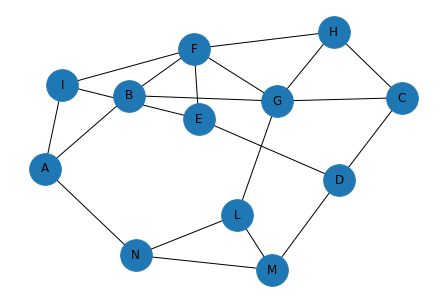

In [22]:
nx.draw(g, with_labels=True, node_size=1000)
plt.show()

In [23]:
nx.diameter(g)

3

In [24]:
list(nx.all_shortest_paths(g, "N", "E"))

[['N', 'M', 'D', 'E'], ['N', 'A', 'I', 'E']]

In [25]:
list(nx.all_shortest_paths(g, "H", "D"))

[['H', 'C', 'D']]

In [26]:
list(nx.all_shortest_paths(g, "M", "F"))

[['M', 'L', 'G', 'F'], ['M', 'D', 'E', 'F']]

In [27]:
list(nx.all_shortest_paths(g, "G", "D"))

[['G', 'C', 'D']]

In [28]:
ebc = nx.edge_betweenness_centrality(g, normalized=False)

In [29]:
ebc

{('A', 'B'): 6.5,
 ('A', 'I'): 6.666666666666667,
 ('A', 'N'): 8.166666666666668,
 ('B', 'G'): 6.833333333333333,
 ('B', 'F'): 4.666666666666667,
 ('G', 'C'): 6.833333333333333,
 ('G', 'F'): 6.666666666666667,
 ('G', 'H'): 4.333333333333333,
 ('G', 'L'): 11.333333333333334,
 ('C', 'D'): 6.833333333333333,
 ('C', 'H'): 3.333333333333333,
 ('D', 'E'): 8.333333333333332,
 ('D', 'M'): 8.5,
 ('E', 'F'): 6.5,
 ('E', 'I'): 4.833333333333333,
 ('F', 'I'): 5.833333333333333,
 ('F', 'H'): 5.0,
 ('N', 'L'): 5.333333333333334,
 ('N', 'M'): 5.5,
 ('L', 'M'): 5.0}

In [30]:
ebc[('E', 'I')], ebc[('L', 'M')]

(4.833333333333333, 5.0)

In [31]:
from networkx.algorithms.tournament import hamiltonian_path
s = nx.to_directed(g)
hamiltonian_path(s)  # g has a hamiltonian path 

['A', 'G', 'B', 'D', 'C', 'F', 'E', 'N', 'L', 'I', 'H', 'M']

## Exercise 4: Indicators

Given *Franklin graph* $\mathcal{G}$ compute:
- Degree Centrality of all nodes;
- Closeness Centrality of A, N;
- Betweenness Centrality of A;
- Local Clustering Coefficient of F, L.


In [32]:
dict(g.degree())

{'A': 3,
 'B': 3,
 'G': 5,
 'C': 3,
 'D': 3,
 'E': 3,
 'F': 5,
 'H': 3,
 'I': 3,
 'N': 3,
 'L': 3,
 'M': 3}

In [33]:
bt = nx.closeness_centrality(g, 'A')

1/bt, bt # non normalized version

(2.0, 0.5)

In [34]:
bt = nx.closeness_centrality(g, 'N')
    
1/bt, bt # non normalized version

(2.090909090909091, 0.4782608695652174)

In [36]:
btc = nx.betweenness_centrality(g, normalized=False)

In [37]:
btc['A']

5.166666666666666

In [38]:
cls = nx.clustering(g)

In [39]:
cls['F'], cls['L']

(0.3, 0.3333333333333333)

## Exercise 5: Assortativity

- Compute the Newman's Assortativity coefficient for the graph graph (Fig. 3).
- Identify 2 nodes that (if their labels are flipped at the same time) allow to switch the graph from assortative to disassortative (or vice versa)

*Note*: Due to an error on the exercise solution proposed in the slide we decided to adjust (for this time only) the evaluation of this exercise in the following way:

- 1pt if the proper formula for Newman's assortativity has been provided
- (up to) 2pt if the attribute mixing matrix has been correctly computed
- 1pt if the assortativity coefficient has been correctly computed OR 1pt if the out of bound result has been identified as an error 
- 1pt if 2 nodes have been properly identified
- 1pt if the identified nodes have been confirmed through the computation of the new assortativity coefficient value

In [40]:
g = nx.Graph()

g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('A', 'D')
g.add_edge('B', 'C')
g.add_edge('B', 'D')
g.add_edge('C', 'D')
g.add_edge('D', 'H')
g.add_edge('D', 'E')
g.add_edge('D', 'G')
g.add_edge('D', 'F')
g.add_edge('H', 'E')
g.add_edge('E', 'F')
g.add_edge('H', 'G')
g.add_edge('F', 'G')

In [41]:
w = ['A', 'B', 'G', 'F']
r = ['C', 'D', 'H', 'E']

for n in w:
    g.add_node(n, label='w')
    
for n in r:
    g.add_node(n, label='r')

In [42]:
nx.attribute_mixing_dict(g, 'label')

{'w': {'w': 4, 'r': 8}, 'r': {'w': 8, 'r': 8}}

In [43]:
color_state_map = {'w': '#aaaaaa', 'r': 'red'}

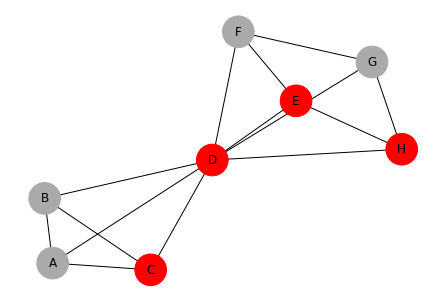

In [44]:
nx.draw(g, node_size=1000, with_labels=True, node_color=[color_state_map[node[1]['label']] for node in g.nodes(data=True)])

In [45]:
nx.attribute_mixing_matrix(g, 'label', normalized=True)

array([[0.28571429, 0.28571429],
       [0.28571429, 0.14285714]])

In [46]:
nx.attribute_mixing_matrix(g, 'label', normalized=False)

array([[8., 8.],
       [8., 4.]])

In [47]:
nx.attribute_assortativity_coefficient(g, 'label')

-0.1666666666666665

- The graph is disassortative (r=0.15). 
- It can be made assortative either: i) switching A and B labels from 'w' to 'r', or ii) G and F from 'w' to 'r', or iii) C and D from 'r' to 'w'.

## Exercise 6: Graph Construction

Given **9** nodes and, at most, **20** edges build a graph such that all the following conditions hold:

- The graph is composed by a single components;
- There exists a path of length 4 between nodes 1 and 5;
- Node 1 has a clustering coefficient of $\frac{1}{3}$;
- The shortest path among 5 and 3 is equal to 2;
- Node 6 has the highest Degree Centrality;
- Node 7 has the lowest Closeness Centrality;

In [48]:
g = nx.Graph()

In [49]:
g.add_edge('1', '2')
g.add_edge('1', '4')
g.add_edge('1', '8')
g.add_edge('2', '6')
g.add_edge('2', '8')
g.add_edge('3', '6')
g.add_edge('3', '8')
g.add_edge('3', '9')
g.add_edge('4', '6')
g.add_edge('5', '7')
g.add_edge('5', '9')
g.add_edge('6', '8')
g.add_edge('7', '5')
g.add_edge('6', '9')

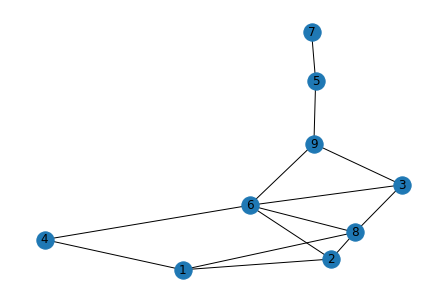

In [50]:
nx.draw(g, with_labels=True)
plt.show()

In [51]:
nx.shortest_path_length(g, '1', '5')

4

In [52]:
pt = list(nx.all_simple_paths(g, '3', '5'))
pt

[['3', '6', '9', '5'],
 ['3', '8', '1', '2', '6', '9', '5'],
 ['3', '8', '1', '4', '6', '9', '5'],
 ['3', '8', '2', '1', '4', '6', '9', '5'],
 ['3', '8', '2', '6', '9', '5'],
 ['3', '8', '6', '9', '5'],
 ['3', '9', '5']]

In [53]:
nx.clustering(g)['1']

0.3333333333333333

In [54]:
bt = nx.closeness_centrality(g)
bt

{'1': 0.42105263157894735,
 '2': 0.5,
 '4': 0.47058823529411764,
 '8': 0.5333333333333333,
 '6': 0.6666666666666666,
 '3': 0.5714285714285714,
 '9': 0.5714285714285714,
 '5': 0.42105263157894735,
 '7': 0.3076923076923077}

In [55]:
sorted(dict(g.degree()).items(), key=lambda x: -x[1])

[('6', 5),
 ('8', 4),
 ('1', 3),
 ('2', 3),
 ('3', 3),
 ('9', 3),
 ('4', 2),
 ('5', 2),
 ('7', 1)]